In [205]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [206]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical

In [207]:
path='/content/'
os.listdir(path)

['.config',
 'fer2013.csv',
 'icml_face_data.csv',
 'left_eye.npy',
 'mouth.npy',
 'valid_image_array.npy',
 'valid_label.npy',
 'right_eye.npy',
 'test.csv',
 'train.csv',
 'nose.npy',
 'shape_predictor_68_face_landmarks.dat',
 'sample_data']

In [225]:
data = pd.read_csv(path+'icml_face_data.csv')

In [226]:
def prepare_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = image.reshape((48, 48))
        image_array[i] = image
    return image_array, image_label

In [227]:
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

In [228]:
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

In [212]:
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

    bar_label = emotions.values()

    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])

    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()

    plt.show()

In [213]:
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()

    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()

    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()

    plt.show()

In [229]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
			4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

train_image_array, train_image_label = prepare_data(data[data[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(data[data[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(data[data[' Usage']=='PublicTest'])

In [230]:
image_array = np.vstack((train_image_array, val_image_array, test_image_array))
labels = np.hstack((train_image_label, val_image_label, test_image_label))

In [231]:
image_array = image_array.reshape((image_array.shape[0], 48, 48, 1))
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [232]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

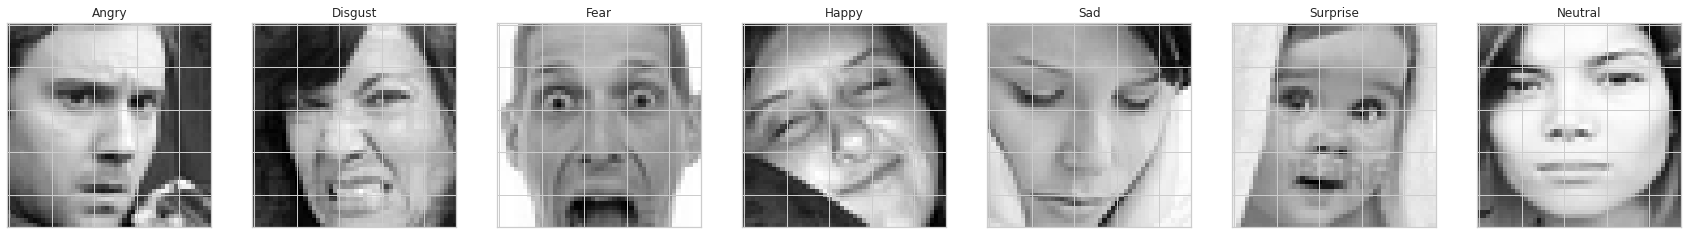

In [233]:
plot_all_emotions()

In [219]:
import cv2
import dlib

In [220]:
# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [221]:
import imutils

In [236]:
left_eye, right_eye, nose, mouth = [], [], [], []
valid_ind = []

In [237]:
for img_tmp in image_array:
    img_tmp = np.array(img_tmp, dtype=np.uint8)

    faces = detector(img_tmp, 1)

    if len(faces) == 1:
        landmarks = predictor(image=img_tmp, box=faces[0])
        left_eye_left = landmarks.part(36).x + .3*np.random.randn(1)
        left_eye_right = landmarks.part(39).x + .3*np.random.randn(1)
        left_eye_up = landmarks.part(38).y + .3*np.random.randn(1)
        left_eye_down = landmarks.part(40).y + .3*np.random.randn(1)
        left_eye_tmp=[left_eye_left,left_eye_right,left_eye_up,left_eye_down]

        right_eye_left = landmarks.part(42).x + .3*np.random.randn(1)
        right_eye_right = landmarks.part(45).x+ .3*np.random.randn(1)
        right_eye_up = landmarks.part(44).y + .3*np.random.randn(1)
        right_eye_down = landmarks.part(46).y + .3*np.random.randn(1)
        right_eye_tmp=[right_eye_left,right_eye_right,right_eye_up,right_eye_down]

        nose_left = landmarks.part(31).x + .3*np.random.randn(1)
        nose_right = landmarks.part(35).x + .3*np.random.randn(1)
        nose_up = landmarks.part(28).y + .3*np.random.randn(1)
        nose_down = landmarks.part(33).y + .3*np.random.randn(1)
        nose_tmp=[nose_left,nose_right,nose_up,nose_down]

        mouth_left = landmarks.part(48).x + .3*np.random.randn(1)
        mouth_right = landmarks.part(54).x + .3*np.random.randn(1)
        mouth_up = landmarks.part(50).y + .3*np.random.randn(1)
        mouth_down = landmarks.part(57).y + .3*np.random.randn(1)
        mouth_tmp=[mouth_left,mouth_right,mouth_up,mouth_down]

        if (landmarks.part(30).y > 22) \
            and (landmarks.part(30).y < 35) \
            and (landmarks.part(30).y - landmarks.part(40).y > 3) \
            and (landmarks.part(30).y - landmarks.part(46).y > 3) \
            and (landmarks.part(30).x - landmarks.part(39).x > 2) \
            and (landmarks.part(42).x - landmarks.part(30).x > 2) \
            and (landmarks.part(66).y - landmarks.part(30).y > 1) \
            and (abs(landmarks.part(27).x - 25) < 3):
        # if ( (left_eye_tmp[1]<=23) and (right_eye_tmp[1]<=23) and (nose_tmp[1]<=33) and (nose_tmp[1]>=23) and (mouth_tmp[1]>=33) ):
            valid_ind.append(1)
            # append data
            left_eye.append(left_eye_tmp)
            right_eye.append(right_eye_tmp)
            nose.append(nose_tmp)
            mouth.append(mouth_tmp)
        else:
            valid_ind.append(0)
    else:
        valid_ind.append(0)

In [238]:
valid_ind = np.array(valid_ind)
left_eye = np.array(left_eye, dtype=np.float32)
right_eye = np.array(right_eye, dtype=np.float32)
nose = np.array(nose, dtype=np.float32)
mouth = np.array(mouth, dtype=np.float32)

In [239]:
valid_image_array = image_array[np.where(valid_ind==1)[0]]
valid_label = labels[np.where(valid_ind==1)[0]]

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

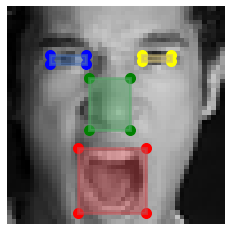

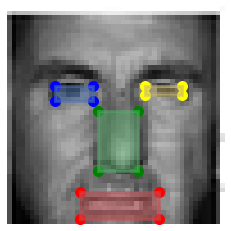

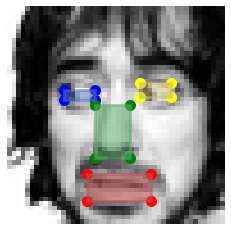

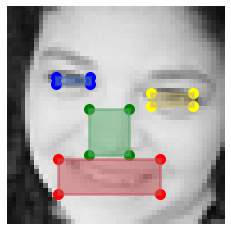

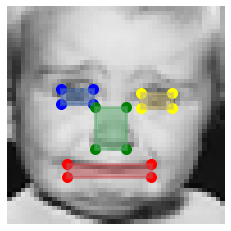

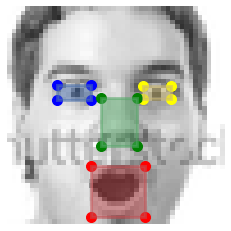

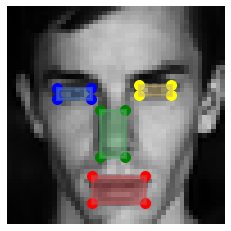

In [241]:
for i in range(7):
    plt.axis('off')
    ind_tmp = np.where(valid_label == i)[0][203]
    plt.imshow(valid_image_array[ind_tmp].squeeze(), cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    plt.scatter(left_eye[ind_tmp,0], left_eye[ind_tmp,2], s=100, c='blue', marker='o')
    plt.scatter(left_eye[ind_tmp,0], left_eye[ind_tmp,3], s=100, c='blue', marker='o')
    plt.scatter(left_eye[ind_tmp,1], left_eye[ind_tmp,2], s=100, c='blue', marker='o')
    plt.scatter(left_eye[ind_tmp,1], left_eye[ind_tmp,3], s=100, c='blue', marker='o')
    
    plt.scatter(right_eye[ind_tmp,0], right_eye[ind_tmp,2], s=100, c='yellow', marker='o')
    plt.scatter(right_eye[ind_tmp,0], right_eye[ind_tmp,3], s=100, c='yellow', marker='o')
    plt.scatter(right_eye[ind_tmp,1], right_eye[ind_tmp,2], s=100, c='yellow', marker='o')
    plt.scatter(right_eye[ind_tmp,1], right_eye[ind_tmp,3], s=100, c='yellow', marker='o')
   
    plt.scatter(nose[ind_tmp,0], nose[ind_tmp,2], s=100, c='green', marker='o')
    plt.scatter(nose[ind_tmp,0], nose[ind_tmp,3], s=100, c='green', marker='o')
    plt.scatter(nose[ind_tmp,1], nose[ind_tmp,2], s=100, c='green', marker='o')
    plt.scatter(nose[ind_tmp,1], nose[ind_tmp,3], s=100, c='green', marker='o')
    
    plt.scatter(mouth[ind_tmp,0], mouth[ind_tmp,2], s=100, c='red', marker='o')
    plt.scatter(mouth[ind_tmp,0], mouth[ind_tmp,3], s=100, c='red', marker='o')
    plt.scatter(mouth[ind_tmp,1], mouth[ind_tmp,2], s=100, c='red', marker='o')
    plt.scatter(mouth[ind_tmp,1], mouth[ind_tmp,3], s=100, c='red', marker='o')
    
    rect_left_eye = patches.Rectangle((left_eye[ind_tmp,0], left_eye[ind_tmp,2]),
                                  left_eye[ind_tmp,1]-left_eye[ind_tmp,0],
                                  left_eye[ind_tmp,3]-left_eye[ind_tmp,2],linewidth=3,
                         edgecolor='b', facecolor='b',alpha=0.5)
    rect_right_eye = patches.Rectangle((right_eye[ind_tmp,0], right_eye[ind_tmp,2]),
                                   right_eye[ind_tmp,1]-right_eye[ind_tmp,0],
                                   right_eye[ind_tmp,3]-right_eye[ind_tmp,2], linewidth=3,
                             edgecolor='y', facecolor='y',alpha=0.5)
    rect_nose = patches.Rectangle((nose[ind_tmp,0], nose[ind_tmp,2]),
                              nose[ind_tmp,1]-nose[ind_tmp,0],
                              nose[ind_tmp,3]-nose[ind_tmp,2], linewidth=3,
                             edgecolor='g', facecolor='g',alpha=0.5)
    rect_mouth = patches.Rectangle((mouth[ind_tmp,0], mouth[ind_tmp,2]),
                               mouth[ind_tmp,1]-mouth[ind_tmp,0],
                               mouth[ind_tmp,3]-mouth[ind_tmp,2], linewidth=3,
                             edgecolor='r', facecolor='r',alpha=0.5)
    ax.add_patch(rect_left_eye)
    ax.add_patch(rect_right_eye)
    ax.add_patch(rect_nose)
    ax.add_patch(rect_mouth)
    plt.show()

In [203]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
             4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [204]:
np.save('valid_image_array', valid_image_array)
np.save('valid_label', valid_label)
np.save('left_eye', left_eye)
np.save('right_eye', right_eye)
np.save('nose', nose)
np.save('mouth', mouth)

In [ ]:
def adaptive(img_array):
  left_eye=[]
  right_eye=[]
  nose=[]
  mouth=[]
  valid_ind=[]
  for img_tmp in img_array:
    img_tmp = np.array(img_tmp, dtype=np.uint8)
    faces = detector(img_tmp, 1)
    if len(faces) == 1:
        landmarks = predictor(image=img_tmp, box=faces[0])
        left_eye_left = landmarks.part(36).x + .3*np.random.randn(1)
        left_eye_right = landmarks.part(39).x + .3*np.random.randn(1)
        left_eye_up = landmarks.part(38).y + .3*np.random.randn(1)
        left_eye_down = landmarks.part(40).y + .3*np.random.randn(1)
        left_eye_tmp=[left_eye_left,left_eye_right,left_eye_up,left_eye_down]

        right_eye_left = landmarks.part(42).x + .3*np.random.randn(1)
        right_eye_right = landmarks.part(45).x+ .3*np.random.randn(1)
        right_eye_up = landmarks.part(44).y + .3*np.random.randn(1)
        right_eye_down = landmarks.part(46).y + .3*np.random.randn(1)
        right_eye_tmp=[right_eye_left,right_eye_right,right_eye_up,right_eye_down]

        nose_left = landmarks.part(31).x + .3*np.random.randn(1)
        nose_right = landmarks.part(35).x + .3*np.random.randn(1)
        nose_up = landmarks.part(28).y + .3*np.random.randn(1)
        nose_down = landmarks.part(33).y + .3*np.random.randn(1)
        nose_tmp=[nose_left,nose_right,nose_up,nose_down]

        mouth_left = landmarks.part(48).x + .3*np.random.randn(1)
        mouth_right = landmarks.part(54).x + .3*np.random.randn(1)
        mouth_up = landmarks.part(50).y + .3*np.random.randn(1)
        mouth_down = landmarks.part(57).y + .3*np.random.randn(1)
        mouth_tmp=[mouth_left,mouth_right,mouth_up,mouth_down]

        if (landmarks.part(30).y > 22) \
            and (landmarks.part(30).y < 35) \
            and (landmarks.part(30).y - landmarks.part(40).y > 3) \
            and (landmarks.part(30).y - landmarks.part(46).y > 3) \
            and (landmarks.part(30).x - landmarks.part(39).x > 2) \
            and (landmarks.part(42).x - landmarks.part(30).x > 2) \
            and (landmarks.part(66).y - landmarks.part(30).y > 1) \
            and (abs(landmarks.part(27).x - 25) < 3):
        # if ( (left_eye_tmp[1]<=23) and (right_eye_tmp[1]<=23) and (nose_tmp[1]<=33) and (nose_tmp[1]>=23) and (mouth_tmp[1]>=33) ):
            valid_ind.append(1)
            # append data
            left_eye.append(left_eye_tmp)
            right_eye.append(right_eye_tmp)
            nose.append(nose_tmp)
            mouth.append(mouth_tmp)
        else:
            valid_ind.append(0)
    else:
        valid_ind.append(0)
    return valid_ind,left_eye,right_eye,nose,mouth